In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [16]:
# Load dataset (Replace 'your_file.csv' with the actual file path)
df = pd.read_csv("structured_parking_data_2024.csv")

# Display dataset structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351360 entries, 0 to 351359
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Timestamp                    351360 non-null  object 
 1   Parking_Lot_ID               351360 non-null  int64  
 2   Total_Parking_Slots          351360 non-null  int64  
 3   Hour                         351360 non-null  int64  
 4   Weather                      351360 non-null  object 
 5   Event                        351360 non-null  int64  
 6   Holiday                      351360 non-null  int64  
 7   Available_Car_Spots          351360 non-null  int64  
 8   Available_Van_Spots          351360 non-null  int64  
 9   Available_Truck_Spots        351360 non-null  int64  
 10  Available_Motorcycle_Spots   351360 non-null  int64  
 11  Avg_Entry_15Min              351360 non-null  int64  
 12  Avg_Exit_15Min               351360 non-null  int64  
 13 

In [17]:

# Check for missing values
print(df.isnull().sum())


Timestamp                      0
Parking_Lot_ID                 0
Total_Parking_Slots            0
Hour                           0
Weather                        0
Event                          0
Holiday                        0
Available_Car_Spots            0
Available_Van_Spots            0
Available_Truck_Spots          0
Available_Motorcycle_Spots     0
Avg_Entry_15Min                0
Avg_Exit_15Min                 0
Avg_Waiting_Time               0
Rush_Time                      0
Car_Booking_Count              0
Van_Booking_Count              0
Truck_Booking_Count            0
Motorcycle_Booking_Count       0
Total_Booking_Count            0
Total_Available_Slots          0
Total_Used_Slots               0
Regular_Customer_Count         0
VIP_Customer_Count             0
Subscription_Customer_Count    0
OneTime_Customer_Count         0
Total_Customer_Type            0
dtype: int64


In [18]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=["Weather"], drop_first=True)


In [19]:
# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract date and time features
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek  # Monday=0, Sunday=6
df["Hour"] = df["Timestamp"].dt.hour  # Extract hour (0-23)
df["Minute"] = df["Timestamp"].dt.minute  # Extract minutes (0, 15, 30, 45)
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)  # Weekend = 1


In [20]:
# Define numerical features for clustering
features = [
    "Total_Parking_Slots", "Available_Car_Spots", "Available_Van_Spots",
    "Available_Truck_Spots", "Available_Motorcycle_Spots",
    "Avg_Entry_15Min", "Avg_Exit_15Min", "Avg_Waiting_Time",
    "Car_Booking_Count", "Van_Booking_Count", "Truck_Booking_Count",
    "Motorcycle_Booking_Count", "Total_Booking_Count", "Total_Available_Slots",
    "Total_Used_Slots", "Regular_Customer_Count", "VIP_Customer_Count",
    "Subscription_Customer_Count", "OneTime_Customer_Count", "Total_Customer_Type",
    "Hour", "DayOfWeek", "IsWeekend"  # Time-based features
]

# Include encoded categorical columns
features += [col for col in df.columns if "Weather_" in col or "Event_" in col or "Holiday_" in col]

# Select the relevant data
df_selected = df[features]

# Show summary statistics
features


['Total_Parking_Slots',
 'Available_Car_Spots',
 'Available_Van_Spots',
 'Available_Truck_Spots',
 'Available_Motorcycle_Spots',
 'Avg_Entry_15Min',
 'Avg_Exit_15Min',
 'Avg_Waiting_Time',
 'Car_Booking_Count',
 'Van_Booking_Count',
 'Truck_Booking_Count',
 'Motorcycle_Booking_Count',
 'Total_Booking_Count',
 'Total_Available_Slots',
 'Total_Used_Slots',
 'Regular_Customer_Count',
 'VIP_Customer_Count',
 'Subscription_Customer_Count',
 'OneTime_Customer_Count',
 'Total_Customer_Type',
 'Hour',
 'DayOfWeek',
 'IsWeekend',
 'Weather_Rainy',
 'Weather_Snowy',
 'Weather_Sunny']

In [21]:
# Standardize the data for K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)



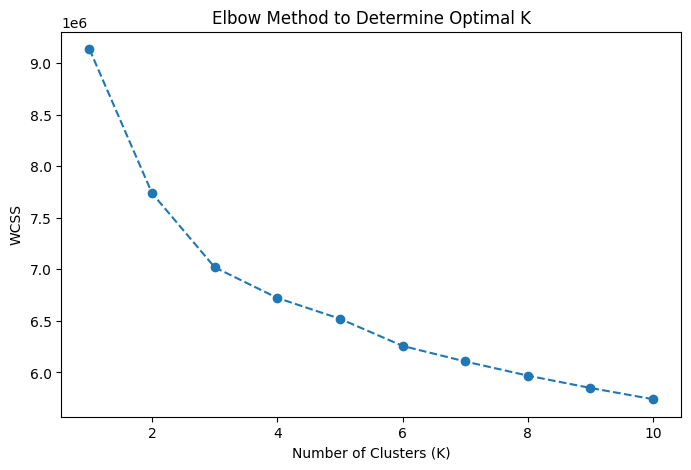

In [22]:
# Use WCSS (Within-Cluster Sum of Squares) to determine optimal K
wcss = []
for k in range(1, 11):  # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [23]:
# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_selected["Cluster"] = kmeans.fit_predict(df_scaled)


C:\Users\Tharindu\AppData\Local\Temp\ipykernel_6796\2195654988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Cluster"] = kmeans.fit_predict(df_scaled)


In [24]:

# Show cluster counts
print(df_selected["Cluster"].value_counts())


Cluster
0    144405
2    144256
1     62699
Name: count, dtype: int64


C:\Users\Tharindu\AppData\Local\Temp\ipykernel_6796\468774600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["PCA1"] = df_pca[:, 0]
C:\Users\Tharindu\AppData\Local\Temp\ipykernel_6796\468774600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["PCA2"] = df_pca[:, 1]


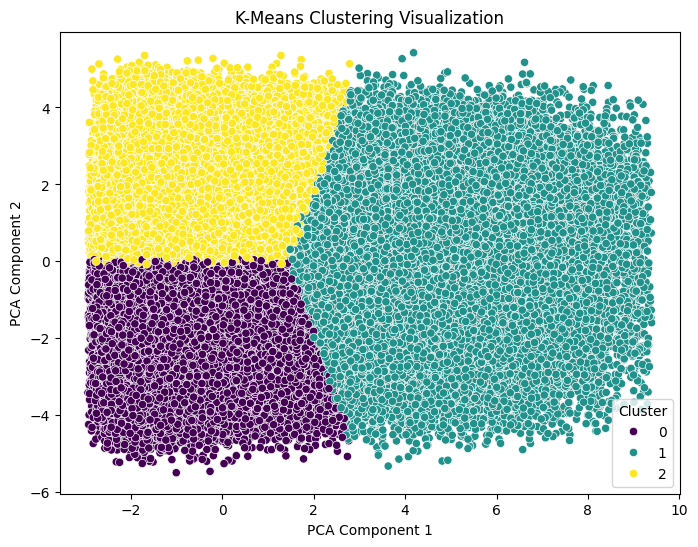

In [25]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add PCA results to DataFrame
df_selected["PCA1"] = df_pca[:, 0]
df_selected["PCA2"] = df_pca[:, 1]

# Plot Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_selected["PCA1"], y=df_selected["PCA2"], hue=df_selected["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()


In [26]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans, "kmeans_parking_model.pkl")

# Save the StandardScaler
joblib.dump(scaler, "scaler_parking.pkl")


['scaler_parking.pkl']

In [27]:
import joblib
import pandas as pd

def predict_parking_cluster(new_data):
  
    # Load the trained model and scaler
    kmeans = joblib.load("kmeans_parking_model.pkl")
    scaler = joblib.load("scaler_parking.pkl")

    # Get feature names from the scaler
    feature_columns = scaler.feature_names_in_

    # Convert dictionary to DataFrame
    new_df = pd.DataFrame([new_data])

    # Add missing categorical columns and set them to 0
    for col in feature_columns:
        if col not in new_df.columns:
            new_df[col] = 0  # Default value

    # Ensure columns are in correct order
    new_df = new_df[feature_columns]

    # Scale the new data
    new_df_scaled = scaler.transform(new_df)

    # Predict cluster
    predicted_cluster = kmeans.predict(new_df_scaled)

    return int(predicted_cluster[0])  # Return the predicted cluster as an integer


In [28]:
# Example input data for prediction
new_parking_data = {
    "Total_Parking_Slots": 100,
    "Available_Car_Spots": 20,
    "Available_Van_Spots": 10,
    "Available_Truck_Spots": 5,
    "Available_Motorcycle_Spots": 15,
    "Avg_Entry_15Min": 8,
    "Avg_Exit_15Min": 6,
    "Avg_Waiting_Time": 12,
    "Car_Booking_Count": 50,
    "Van_Booking_Count": 15,
    "Truck_Booking_Count": 8,
    "Motorcycle_Booking_Count": 20,
    "Total_Booking_Count": 93,
    "Total_Available_Slots": 30,
    "Total_Used_Slots": 70,
    "Regular_Customer_Count": 40,
    "VIP_Customer_Count": 20,
    "Subscription_Customer_Count": 10,
    "OneTime_Customer_Count": 23,
    "Total_Customer_Type": 3,
    "Hour": 15,  # Example: 3 PM
    "DayOfWeek": 2,  # Example: Wednesday
    "IsWeekend": 0,  # Not a weekend
    "Weather_Sunny": 1  # Example: Weather condition
}

# Predict cluster
predicted_cluster = predict_parking_cluster(new_parking_data)
print(f"Predicted Cluster: {predicted_cluster}")



Predicted Cluster: 2


C:\Users\Tharindu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


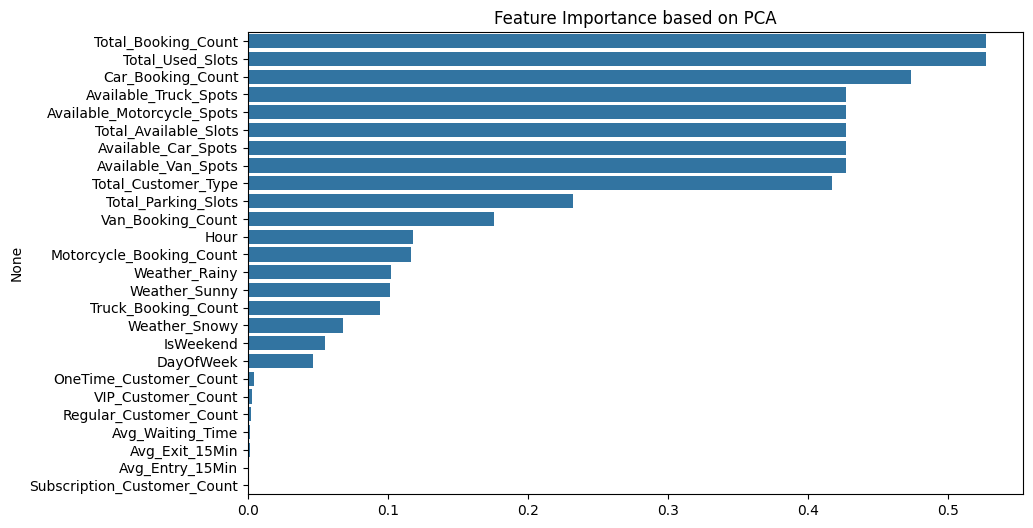

In [30]:
# Show relative importance of features using PCA components
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the explained variance ratio from PCA
feature_importance = np.abs(pca.components_).sum(axis=0)
feature_names = df_selected.columns[:-3]  # Exclude the last three columns (Cluster, PCA1, PCA2)

indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title("Feature Importance based on PCA")
plt.show()